In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

Data from National Data Buoy Center (NDBC)
* https://www.ndbc.noaa.gov
* station 44008 (Georges Bank)
* historical standard meteorological data

In [2]:
data = pd.read_csv('44008_Feb2023.txt', delim_whitespace=True, header=0)

Dropping the first row with the units

In [3]:
df = data.iloc[1: , :]

Adding the datetime column

In [5]:
df_date = pd.to_datetime(df['#YY'].astype(str) + ' ' + df['MM'].astype(str) + ' ' + df['DD'].astype(str) 
                      + ' ' + df['hh'].astype(str) + ' ' + df['mm'].astype(str), format='%Y %m %d %H %M')

df['datetime'] = df_date

/tmp/ipykernel_31992/863497144.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['datetime'] = df_date


Filtering out entries where either air or water temperature is missing:

In [6]:
df = df[df['WTMP'] != '999.0']

Converting water temperature to a float array

In [7]:
wtmp = df.WTMP.values.astype(float)

Adding the spring and neap tides

In [8]:
dt28 = datetime(2023, 3, 1, 0, 0, 0)
dt29 = datetime(2023, 2, 23, 0, 0, 0)
dt30 = datetime(2023, 2, 15, 0, 0, 0)
dt31 = datetime(2023, 2, 8, 0, 0, 0)
dt32 = datetime(2023, 1, 31, 0, 0, 0)

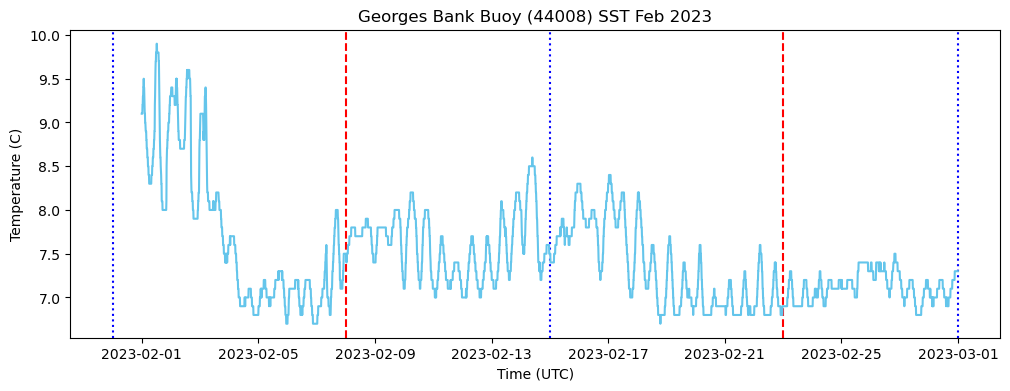

In [10]:
fig, ax = plt.subplots(1, figsize=(12,4))

ax.axvline(x=dt29, color='r', linestyle='--', label='Spring')
ax.annotate('Spring', (dt29, 22), textcoords='offset points', xytext=(10,10), ha='center', fontsize=12, color='r')
ax.axvline(x=dt31, color='r', linestyle='--', label='Spring')

ax.axvline(x=dt28, color='b', linestyle=':', label='Neap')
ax.annotate('Neap', (dt28, 22), textcoords='offset points', xytext=(10,10), ha='center', fontsize=12, color='b')
ax.axvline(x=dt30, color='b', linestyle=':', label='Neap')
ax.axvline(x=dt32, color='b', linestyle=':', label='Neap')

ax.plot(df.datetime, wtmp, c='#64C5EB')

ax.set_xlabel('Time (UTC)')
ax.set_ylabel('Temperature (C)')
ax.set_title('Georges Bank Buoy (44008) SST Feb 2023')
plt.show()